# Exploratory data analysis on raw dataset

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import geopandas as gpd
import utils.constants as c
from utils.data_utils import load_dataset, load_metadata
import os
from scipy import signal
import numpy as np
import numpy as np

if "notebooks" in os.getcwd():
    os.chdir("..")

In [65]:
df_complete_dataset = load_dataset()
df_station_metadata = load_metadata()

## Basic information of dataset

In [66]:
df_complete_dataset.describe()

,air_pressure_00183,air_pressure_00591,air_pressure_01694,air_pressure_01759,air_pressure_01975,air_pressure_02115,air_pressure_02429,air_pressure_02907,air_pressure_03032,air_pressure_03093,...,wind_speed_03897,wind_speed_04039,wind_speed_04271,wind_speed_04393,wind_speed_04466,wind_speed_04625,wind_speed_04642,wind_speed_05516,wind_speed_05930,wind_speed_06163
count,366732.000000,367877.000000,366716.000000,367545.000000,367645.000000,362839.000000,367356.000000,367168.000000,367817.000000,350436.000000,...,365250.000000,351802.000000,366594.000000,366835.000000,367079.000000,349986.000000,367614.000000,367253.000000,365726.000000,365219.000000
mean,1009.400500,1009.550212,1007.759282,1013.114153,1013.127124,1013.930798,1011.621765,1013.147492,1010.417678,1013.301949,...,4.371748,3.088341,4.784198,6.300171,3.622190,3.732734,3.498865,6.235714,5.194645,3.646118
std,10.338509,10.072843,9.970050,10.171026,10.291150,10.929107,10.466248,10.866340,11.073026,9.794771,...,2.436726,1.882971,2.798478,3.248447,1.850551,1.965918,1.935060,3.333411,2.819680,2.136734
min,965.200000,969.500000,969.300000,970.400000,972.200000,970.700000,970.400000,969.500000,966.000000,973.500000,...,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000
25%,1003.200000,1003.500000,1001.800000,1007.000000,1006.900000,1007.300000,1005.300000,1006.600000,1003.800000,1007.500000,...,2.600000,1.700000,2.800000,3.800000,2.200000,2.300000,2.100000,3.700000,3.100000,2.100000
50%,1010.100000,1010.300000,1008.500000,1013.800000,1013.900000,1014.900000,1012.500000,1014.100000,1011.500000,1014.000000,...,3.900000,2.800000,4.100000,5.700000,3.300000,3.400000,3.200000,5.700000,4.700000,3.300000
75%,1016.100000,1016.000000,1014.200000,1019.700000,1019.800000,1021.200000,1018.400000,1020.300000,1017.800000,1019.600000,...,5.700000,4.200000,6.000000,8.200000,4.700000,4.800000,4.600000,8.200000,6.800000,4.900000
max,1043.500000,1042.200000,1040.100000,1046.500000,1046.200000,1048.200000,1045.300000,1048.500000,1046.200000,1045.500000,...,20.200000,15.600000,24.100000,27.400000,14.700000,18.400000,18.800000,27.600000,22.700000,17.000000


In [67]:
df_complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367921 entries, 2017-01-01 00:00:00 to 2023-12-31 00:00:00
Columns: 120 entries, air_pressure_00183 to wind_speed_06163
dtypes: float64(120)
memory usage: 339.6 MB


## Missing values

Count missing total missing values

In [68]:
total_number_of_values = df_complete_dataset.size
total_number_of_missing_values = df_complete_dataset.isna().sum().sum()
percentage_of_missing_values = (
    total_number_of_missing_values / total_number_of_values
) * 100

print(f"Total number of values: {total_number_of_values}")
print(f"Total number of missing values: {total_number_of_missing_values}")
print(f"Percentage of missing values: {percentage_of_missing_values}")

Total number of values: 44150520
Total number of missing values: 513763
Percentage of missing values: 1.1636623985402663


Count missing values per column

In [69]:
number_of_missing_values_per_column = df_complete_dataset.isna().sum()
percentage_of_missing_values_per_column = (
    number_of_missing_values_per_column / len(df_complete_dataset)
) * 100

missing_values_per_column_stats = pd.DataFrame(
    {
        "Missing Count": number_of_missing_values_per_column,
        "Missing Percent": percentage_of_missing_values_per_column,
    }
)

print("Missing values for each column (10 columns with the highest ratio of missing values):")
print(missing_values_per_column_stats.sort_values(by="Missing Percent", ascending=False)[:10])

Missing values for each column (10 columns with the highest ratio of missing values):
                         Missing Count  Missing Percent
wind_speed_02115                 59878        16.274689
wind_direction_02115             59878        16.274689
wind_direction_03093             21728         5.905616
wind_speed_03093                 21724         5.904528
dew_point_03093                  21721         5.903713
air_temperature_03093            21704         5.899092
relative_humidity_03093          21628         5.878436
wind_direction_03032             20607         5.600931
wind_speed_03032                 20607         5.600931
wind_speed_04625                 17935         4.874688


Count missing values per station

In [70]:
missing_values_per_station_stats = {}

for col in df_complete_dataset.columns:
    station_id = col.split("_")[-1]
    missing_values_per_station_stats.setdefault(
        station_id, {"Missing Count": 0, "Missing Percent": 0}
    )

    num_missing_values = df_complete_dataset[col].isna().sum()
    missing_values_per_station_stats[station_id][
        "Missing Count"
    ] += num_missing_values

number_of_columns_per_station = len(missing_values_per_station_stats)
number_of_values_per_station = total_number_of_values / number_of_columns_per_station

for station_id in missing_values_per_station_stats.keys():
    num_missing_values = missing_values_per_station_stats[station_id][
        "Missing Count"
    ]
    missing_values_per_station_stats[station_id]["Missing Percent"] = (
        num_missing_values / number_of_values_per_station
    ) * 100

missing_values_per_station_stats_df = pd.DataFrame(
    missing_values_per_station_stats
).transpose()

print("Missing values for each station:")
print(
    missing_values_per_station_stats_df.sort_values(
        by="Missing Percent", ascending=False
    )
)

Missing values for each station:
       Missing Count  Missing Percent
02115       143315.0         6.492109
03093       125990.0         5.707294
03032        41744.0         1.890986
04039        41502.0         1.880023
04625        36464.0         1.651804
01759        16178.0         0.732857
06163        15639.0         0.708440
03897        14839.0         0.672200
05930        12951.0         0.586675
01694         9250.0         0.419021
00183         8111.0         0.367425
04393         7870.0         0.356508
04271         7685.0         0.348127
02907         7558.0         0.342374
04466         6505.0         0.294674
01975         5153.0         0.233429
05516         5041.0         0.228355
00591         3780.0         0.171232
02429         3574.0         0.161901
04642          614.0         0.027814


Check missing values for the reference station

In [71]:
print("Missing Values for reference station:")
print(
    missing_values_per_column_stats.loc[
        missing_values_per_column_stats.index.str.contains("03897")
    ]
)

Missing Values for reference station:
                         Missing Count  Missing Percent
air_pressure_03897                2618         0.711566
air_temperature_03897             1776         0.482712
dew_point_03897                   2620         0.712109
relative_humidity_03897           2615         0.710750
wind_direction_03897              2539         0.690094
wind_speed_03897                  2671         0.725971


Check for skipped timestamps


In [72]:
expected_freq = pd.date_range(
    start=df_complete_dataset.index.min(),
    end=df_complete_dataset.index.max(),
    freq="10min",
)
missing_timestamps = expected_freq.difference(df_complete_dataset.index)
print(f"Number of missing timestamps: {len(missing_timestamps)}")

Number of missing timestamps: 0


In [73]:
reference_wind_speed_column = f"wind_speed_{c.REFERENCE_STATION_ID}"
a = df_complete_dataset[reference_wind_speed_column].values  # Extract out relevant column from dataframe as array
m = np.concatenate(( [True], np.isnan(a), [True] ))  # Mask
ss = np.flatnonzero(m[1:] != m[:-1]).reshape(-1,2)   # Start-stop limits
start,stop = ss[(ss[:,1] - ss[:,0]).argmax()]  # Get max interval, interval limits
start_time = df_complete_dataset.index[start]
stop_time = df_complete_dataset.index[stop]
print(start_time, stop_time)

2017-11-03 00:10:00 2020-05-13 11:10:00


## Explore reference station

### Wind direction


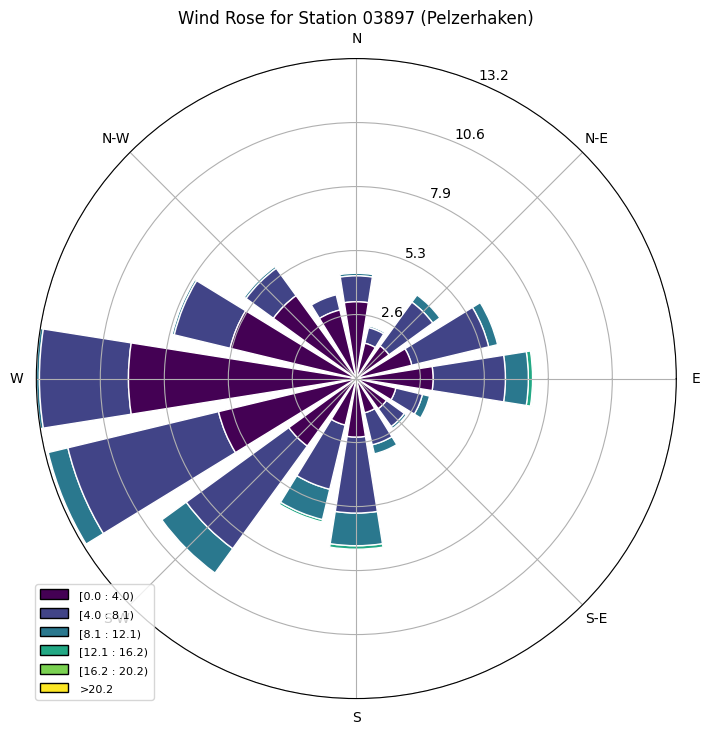

In [74]:

reference_wind_direction_column = f"wind_direction_{c.REFERENCE_STATION_ID}"
reference_wind_speed_column = f"wind_speed_{c.REFERENCE_STATION_ID}"

df_reference_wind = df_complete_dataset[
    [reference_wind_direction_column, reference_wind_speed_column]
].dropna()

station_name = df_station_metadata.loc[c.REFERENCE_STATION_ID, "name"]

wind_rose_fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=wind_rose_fig)
ax.bar(
    df_reference_wind[reference_wind_direction_column],
    df_reference_wind[reference_wind_speed_column],
    normed=True,
    opening=0.8,
    edgecolor="white",
)

ax.set_legend()

plt.title(f"Wind Rose for Station {c.REFERENCE_STATION_ID} ({station_name})")
plt.show()

### Periodicity of wind speeds at reference station


In [75]:
wind_speeds_at_ref = df_complete_dataset.loc["2018-01-01 00:10:00":"2021-12-31 00:00:00", reference_wind_speed_column]
print(wind_speeds_at_ref.isna().sum())
percent_nans = (wind_speeds_at_ref.isna().sum() / len(wind_speeds_at_ref)) * 100
print(percent_nans)
wind_speeds_at_ref_no_nans = wind_speeds_at_ref.interpolate("linear")

49
0.02330669710806697



Top spectral peaks:


,frequency_Hz,period_hours,period_days,PSD
0,3.170979e-08,8760.00,365.00,4.536577e+07
1,3.329528e-07,834.29,34.76,7.613455e+06
2,1.157407e-05,24.00,1.00,7.211843e+06


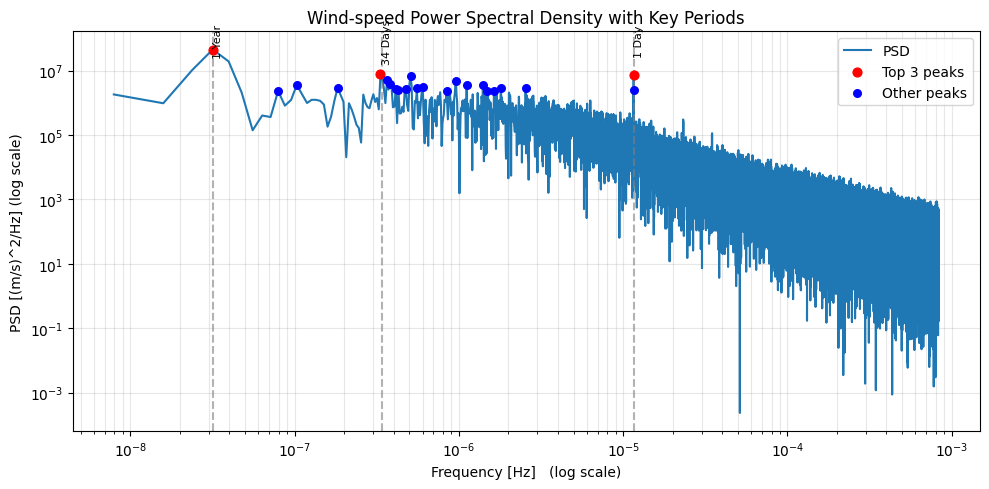

In [76]:

fs = 1 / (10 * 60)
freqs, psd = signal.periodogram(wind_speeds_at_ref_no_nans, fs=fs, window="hann", scaling="density")
freqs, psd = freqs[1:], psd[1:]

peaks, properties = signal.find_peaks(psd, height=psd.max()*0.05)

period_sec = 1 / freqs[peaks]
period_hr  = period_sec / 3600
period_day = period_hr  / 24

peak_info = (
    pd.DataFrame({
        "frequency_Hz": freqs[peaks],
        "period_hours": period_hr,
        "period_days":  period_day,
        "PSD": properties["peak_heights"],
    })
    .sort_values("PSD", ascending=False)
    .reset_index(drop=True)
)

print("\nTop spectral peaks:")
display(peak_info.head(3).round({"period_hours":2, "period_days":2}))

plt.figure(figsize=(10, 5))
plt.loglog(freqs, psd, label="PSD")

top_peak_indices = np.argsort(properties["peak_heights"])[-3:]
all_peak_indices = np.arange(len(peaks))

plt.scatter(freqs[peaks[top_peak_indices]], psd[peaks[top_peak_indices]],
            marker="o", s=40, color="red", zorder=3, label="Top 3 peaks")

other_peak_indices = np.setdiff1d(all_peak_indices, top_peak_indices)
if len(other_peak_indices) > 0:
    plt.scatter(freqs[peaks[other_peak_indices]], psd[peaks[other_peak_indices]],
                marker="o", s=30, color="blue", zorder=3, label="Other peaks")

periods = {
    "1 Day": 1 / 86400,
    "34 Days": 1 / (34 * 86400),
    "1 Year": 1 / (365.25 * 86400),
}

for label, f in periods.items():
    plt.axvline(x=f, linestyle="--", color="gray", alpha=0.6)
    plt.text(f, plt.ylim()[1] * 0.5, label, rotation=90, verticalalignment='center', fontsize=8)

plt.title("Wind-speed Power Spectral Density with Key Periods")
plt.xlabel("Frequency [Hz]   (log scale)")
plt.ylabel("PSD [(m/s)^2/Hz] (log scale)")
plt.grid(alpha=0.3, which="both")
plt.legend()
plt.tight_layout()
plt.show()

## Visualize station locations

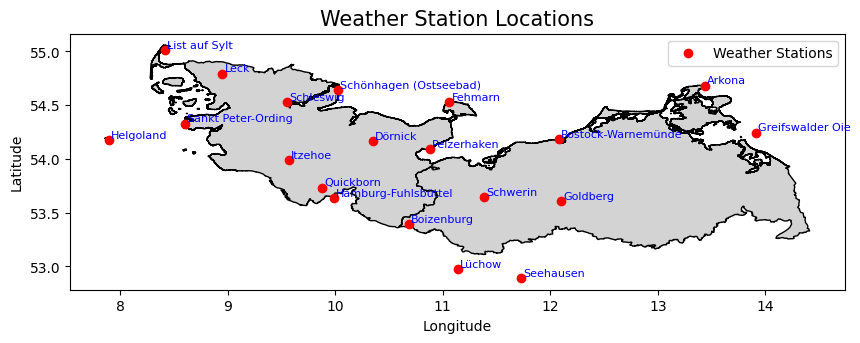

In [77]:
gdf_stations = gpd.GeoDataFrame(
    df_station_metadata,
    geometry=gpd.GeoSeries.from_xy(
        df_station_metadata.geographic_longitude,
        df_station_metadata.geographic_latitude,
    ),
)

germany = gpd.read_file("notebooks/shape_files/gadm41_DEU_shp/gadm41_DEU_1.shp")
schleswig_holstein = germany[germany.NAME_1 == "Schleswig-Holstein"]
meck_pom = germany[germany.NAME_1 == "Mecklenburg-Vorpommern"]

fig, ax = plt.subplots(figsize=(10, 10))

schleswig_holstein.plot(ax=ax, color="lightgray", edgecolor="black")
meck_pom.plot(ax=ax, color="lightgray", edgecolor="black")

gdf_stations.plot(ax=ax, color="red", marker="o", label="Weather Stations")

for x, y, label in zip(
    gdf_stations.geometry.x, gdf_stations.geometry.y, gdf_stations["name"]
):
    ax.text(x + 0.02, y + 0.02, label, fontsize=8, ha="left", color="blue")

ax.set_title("Weather Station Locations", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.legend()

plt.show()